In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVC


from sklearn.preprocessing import StandardScaler,MinMaxScaler


### PROBLEM STATEMENT

To predict the charges for medical insurance using supervised machine learning
algorithm

### DATA GATHERING 

In [2]:
df = pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### EXPLORATORY DATA ANALYSIS

In [3]:
df.info()              #   there are three columns are object datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
row_count = df.shape[0]
row_count

1338

In [5]:
columns_count = df.shape[1]
columns_count

7

In [6]:
df.describe()        # statistical analysis

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [8]:
df["age"].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [9]:
df["bmi"].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [10]:
df["bmi"].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [11]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [12]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [13]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [14]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [15]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [17]:
df["charges"].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [18]:
df["charges"].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

#### Converting catogorical data into numerical format by using label encoding and one hot encoding

In [19]:
df["sex"].replace({"male":0,"female":1},inplace = True)

In [20]:
sex_values = {"male":0,"female":1}
sex_values

{'male': 0, 'female': 1}

In [21]:
df["smoker"].replace({"no":0,"yes":1},inplace = True)

In [22]:
smoker_values = {"no":0,"yes":1}
smoker_values 

{'no': 0, 'yes': 1}

In [23]:
df = pd.get_dummies(df,columns = ["region"])

In [24]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [25]:
df.info()       # after converting catogorical data into numerical format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


### Detect outliers

<AxesSubplot:>

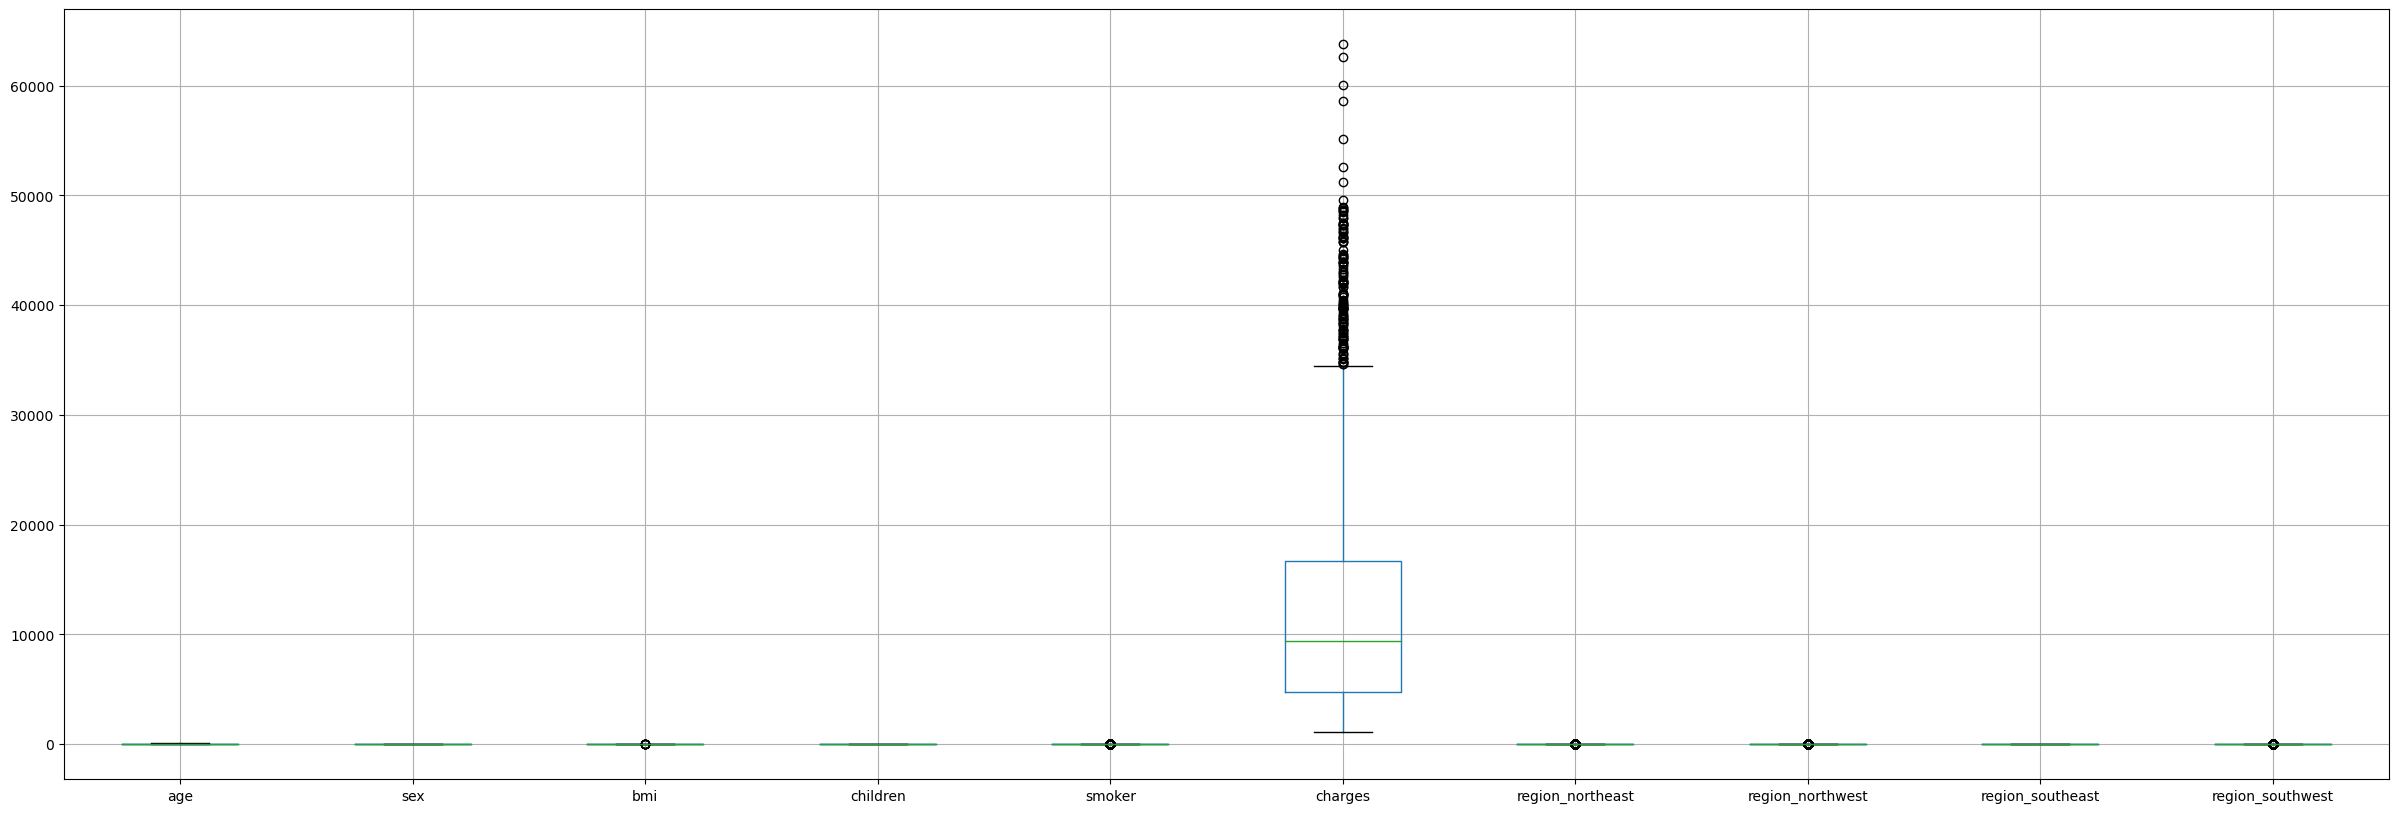

In [26]:
plt.figure(figsize = (30,10))                # some outliers are present in bmi(feature)
df.boxplot()

### Detect missing values

In [27]:
df.isna().sum()      # there is no missing values

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

### FEATURE ENGINEERING

#### imputing outliers

In [28]:
q1 = df["bmi"].quantile(0.25)
q2 = df["bmi"].quantile(0.50)
q3 = df["bmi"].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr


print("q1",q1)
print("q2",q2)
print("q3",q3)

print("upper_tail", upper_tail)
print("lower_tail", lower_tail)

q1 26.29625
q2 30.4
q3 34.69375
upper_tail 47.290000000000006
lower_tail 13.7


<AxesSubplot:xlabel='bmi'>

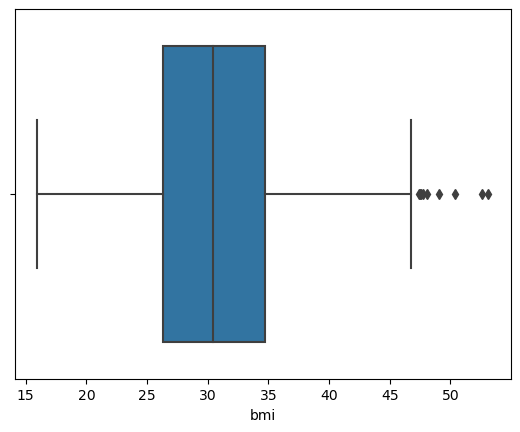

In [29]:
sns.boxplot(x = df["bmi"])    

In [30]:
median_bmi = df["bmi"].loc[(df["bmi"] <= upper_tail) & (df["bmi"] >= lower_tail)].median()
median_bmi

30.3

In [31]:
warnings.filterwarnings ("ignore")

In [32]:
df["bmi"].loc[(df["bmi"] > upper_tail) | (df["bmi"] < lower_tail)] = median_bmi

<AxesSubplot:xlabel='bmi'>

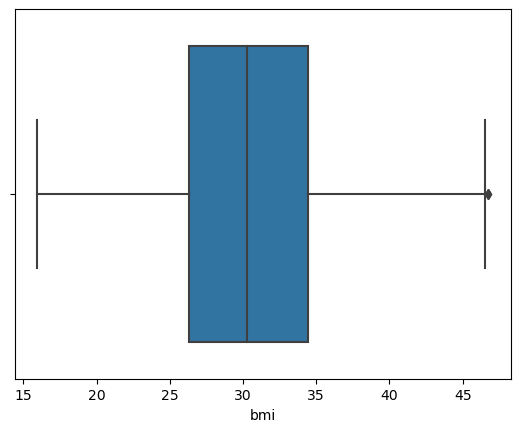

In [33]:
sns.boxplot(x = df["bmi"])    

In [34]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


### FEATURE SELECTION

### Linearity

In [35]:
df1 = df.drop("charges",axis = 1)
df2 = df["charges"]
df3 = pd.concat([df1,df2],axis = 1)
df3

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,1,27.900,0,1,0,0,0,1,16884.92400
1,18,0,33.770,1,0,0,0,1,0,1725.55230
2,28,0,33.000,3,0,0,0,1,0,4449.46200
3,33,0,22.705,0,0,0,1,0,0,21984.47061
4,32,0,28.880,0,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,1,0,0,10600.54830
1334,18,1,31.920,0,0,1,0,0,0,2205.98080
1335,18,1,36.850,0,0,0,0,1,0,1629.83350
1336,21,1,25.800,0,0,0,0,0,1,2007.94500


In [36]:
df3.corr()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
age,1.000000,0.020856,0.114273,0.042469,-0.025019,0.002475,-0.000407,-0.011642,0.010016,0.299008
sex,0.020856,1.000000,-0.039736,-0.017163,-0.076185,0.002425,0.011156,-0.017117,0.004184,-0.057292
bmi,0.114273,-0.039736,1.000000,0.017377,-0.002943,-0.135819,-0.128304,0.253677,0.000733,0.190559
children,0.042469,-0.017163,0.017377,1.000000,0.007673,-0.022808,0.024806,-0.023066,0.021914,0.067998
smoker,-0.025019,-0.076185,-0.002943,0.007673,1.000000,0.002811,-0.036945,0.068498,-0.036945,0.787251
region_northeast,0.002475,0.002425,-0.135819,-0.022808,0.002811,1.000000,-0.320177,-0.345561,-0.320177,0.006349
region_northwest,-0.000407,0.011156,-0.128304,0.024806,-0.036945,-0.320177,1.000000,-0.346265,-0.320829,-0.039905
region_southeast,-0.011642,-0.017117,0.253677,-0.023066,0.068498,-0.345561,-0.346265,1.000000,-0.346265,0.073982
region_southwest,0.010016,0.004184,0.000733,0.021914,-0.036945,-0.320177,-0.320829,-0.346265,1.000000,-0.043210
charges,0.299008,-0.057292,0.190559,0.067998,0.787251,0.006349,-0.039905,0.073982,-0.043210,1.000000


<AxesSubplot:>

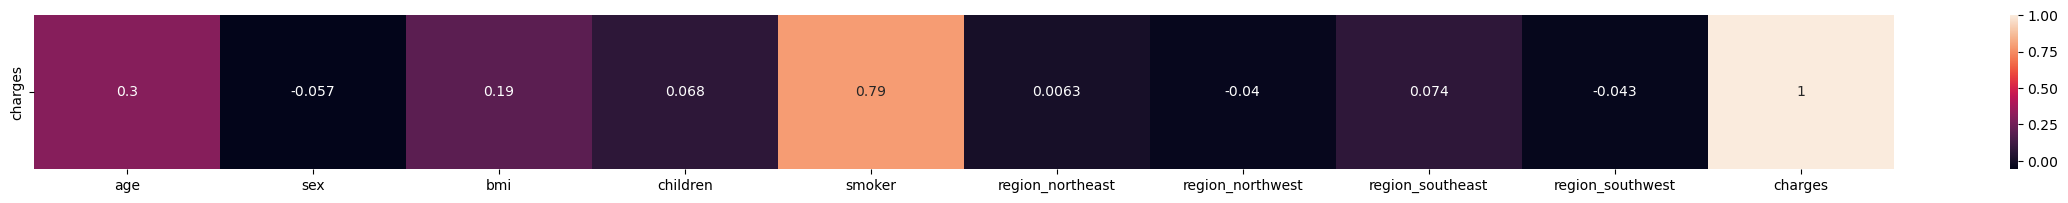

In [37]:
plt.figure(figsize = (30,2))
sns.heatmap(df3.corr().tail(1),annot = True)

### No Multicolinearity

In [38]:
df1

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,1,0,0
1334,18,1,31.920,0,0,1,0,0,0
1335,18,1,36.850,0,0,0,0,1,0
1336,21,1,25.800,0,0,0,0,0,1


<AxesSubplot:>

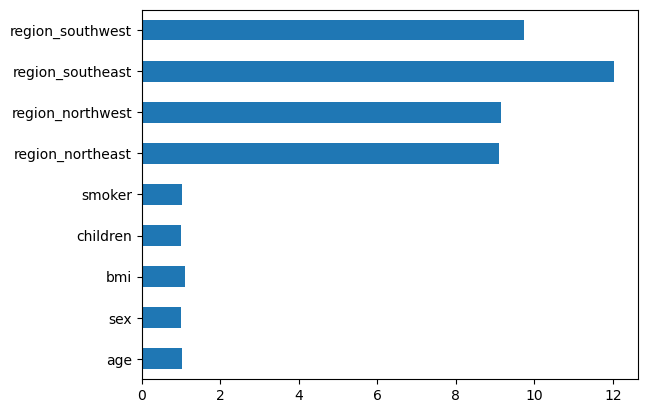

In [39]:
Vif_list = []

for i in range(df1.shape[1]):
    
    vif = variance_inflation_factor(df1.to_numpy(),i)
    
    Vif_list.append(vif)
    
df2 = pd.Series(Vif_list, index = df1.columns)

df2.plot(kind = "barh")
    
    

### MODEL BUILDING

In [40]:
x = df.drop("charges",axis = 1)
y = df["charges"]

In [41]:
model_details = []
training_accuracy = []
testing_accuracy = []

In [42]:
x_train, x_test, y_train , y_test = train_test_split(x,y, train_size=0.8 , random_state=11)

In [43]:
model = LinearRegression()     #create instance of the model
model_details.append("linear_Regression")

In [44]:
model.fit(x_train , y_train)    # we fit the model on training datasets

LinearRegression()

In [45]:
model.coef_           # It will give slop

array([  264.94034899,   366.06178021,   339.29394692,   535.13746696,
       23595.1809077 ,   616.26119233,   131.46406971,  -302.59581547,
        -445.12944658])

### MODEL EVALUATION

#### Training dataset

In [46]:
y_pred = model.predict(x_train)
y_pred

array([11243.65282169,  2582.22338622,  9429.78090149, ...,
        9597.46492951, 12827.20383375,  6406.83282614])

In [47]:
residual = y_train - y_pred 
residual

316     -2408.387872
340     16372.996784
151     -1640.145901
1282    -9350.287394
557     -3315.651816
            ...     
583     13587.033324
332      -740.460866
1293     -295.571380
1115    -2019.717534
1104    14013.771824
Name: charges, Length: 1070, dtype: float64

<AxesSubplot:xlabel='charges', ylabel='Density'>

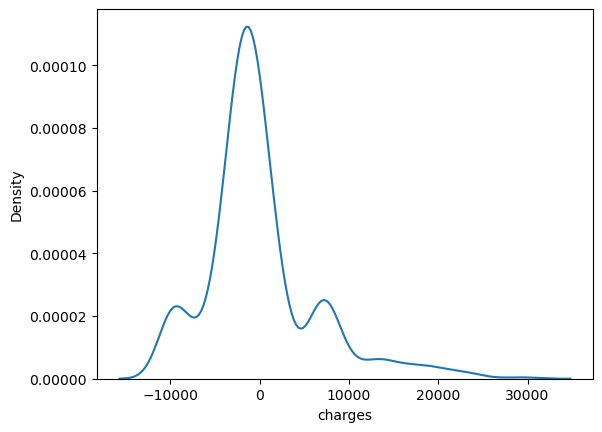

In [48]:
sns.kdeplot(residual)           # plot resudual        # it is not narmally distributed

In [49]:
MSE = mean_squared_error(y_train , y_pred)

RMSE = np.sqrt(MSE)

MAE = mean_absolute_error(y_train , y_pred)

R2_training = model.score(x_train, y_train)

adj_r2_training = 1 - (((1 - R2_training) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", R2_training )

print("Adjusted R Squared Value --->",adj_r2_training)

training_accuracy.append(adj_r2_training)

MSE on training dataset ---> 39093416.86269204
RMSE on training dataset ---> 6252.472859812511
MAE on training dataset ---> 4303.040693780996
R2 on training dataset ---> 0.7367268644649843
Adjusted R Squared Value ---> 0.7344915265217624


#### Testing dataset

In [50]:
y_pred_test = model.predict(x_test)

In [51]:
residual = y_test - y_pred_test 
residual

1313    8065.611494
1254    -999.716981
372    -3193.038199
937      302.303349
484    -2890.382827
           ...     
427     4738.767861
1153   -3765.140132
973    -3875.075556
608     -762.132128
775    -2501.159677
Name: charges, Length: 268, dtype: float64

<AxesSubplot:xlabel='charges', ylabel='Density'>

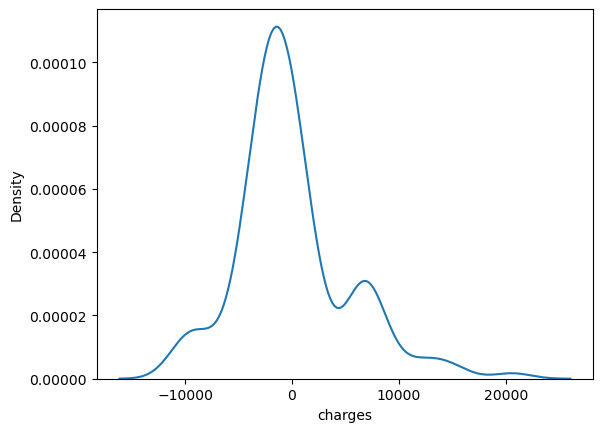

In [52]:
sns.kdeplot(residual)           # plot test_resudual

In [53]:
MSE = mean_squared_error(y_test , y_pred_test)

RMSE = np.sqrt(MSE)

MAE = mean_absolute_error(y_test ,y_pred_test)

R2_testing = model.score(x_test, y_test)

adj_r2_testing  = 1 - (((1 - R2_testing) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))


print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", R2_testing)

print("Adjusted R Squared Value :",adj_r2_testing)

testing_accuracy.append(adj_r2_testing)

MSE on training dataset ---> 27523934.772230797
RMSE on training dataset ---> 5246.3258354996215
MAE on training dataset ---> 3780.5153606917615
R2 on training dataset ---> 0.8015189494712379
Adjusted R Squared Value : 0.7945951918946532


## Normality of residual

#### Hypothesis testing

In [54]:
from scipy.stats import shapiro

#### shapiro test

In [55]:
_ , p_val = shapiro(residual)
print("P_Value:",p_val)
if p_val >= 0.05:
    print("Null Hypothesis is Accepted")
    print("Data is Normally Distributed")
else:
    print("Null Hypothesis is Rejected and Alternate Hypothesis is Accepted")
    print("Data is not Normally Distributed")

P_Value: 1.1158757945439746e-10
Null Hypothesis is Rejected and Alternate Hypothesis is Accepted
Data is not Normally Distributed


#### QQ plot

In [56]:
import statsmodels.api as sm

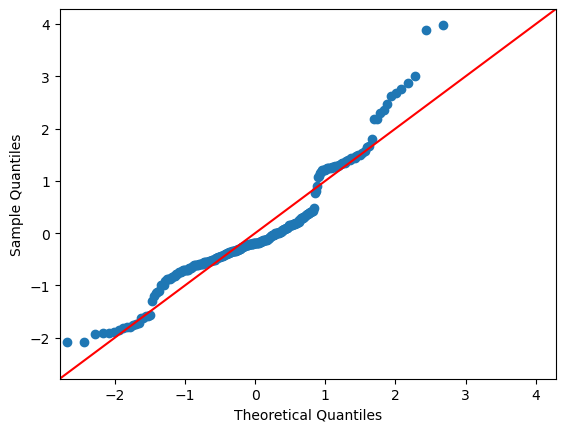

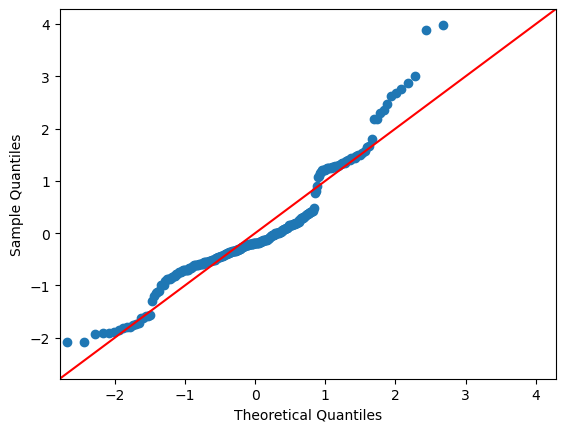

In [57]:
sm.qqplot(residual, line = "45", fit = True)             # data is not normaly distrubuted

#### homoscedasticity

<AxesSubplot:>

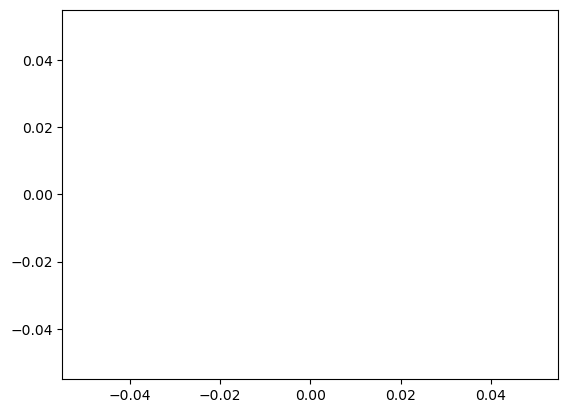

In [58]:
sns.scatterplot(x = y_train , y = residual)

### Regularization

### reduce overfitting

### Ridge regression

In [59]:
#by default value of alpha

In [60]:
ridge_reg_model = Ridge()  
ridge_reg_model.fit(x_train, y_train)
model_details.append("Ridge_Regression")

### Training Dataset

In [61]:
y_pred = ridge_reg_model.predict(x_train)

MSE = mean_squared_error(y_train , y_pred)

RMSE = np.sqrt(MSE)

MAE = mean_absolute_error(y_train , y_pred)

R2_training = ridge_reg_model.score(x_train, y_train)

adj_r2_training = 1 - (((1 - R2_training) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", R2_training )

print("Adjusted R Squared Value --->",adj_r2_training)

training_accuracy.append(adj_r2_training)

MSE on training dataset ---> 39096390.26797102
RMSE on training dataset ---> 6252.710633634905
MAE on training dataset ---> 4312.040316345216
R2 on training dataset ---> 0.7367068401797252
Adjusted R Squared Value ---> 0.7344713322189871


### Testing Dataset

In [62]:
y_pred = ridge_reg_model.predict(x_test)

MSE = mean_squared_error(y_test , y_pred)

RMSE = np.sqrt(MSE)

MAE = mean_absolute_error(y_test, y_pred)

r2_score = ridge_reg_model.score(x_test , y_test)

adj_r2 = 1 - (((1 - r2_score ) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", r2_score )

print("Adjusted R Squared Value --->",adj_r2)

testing_accuracy.append(adj_r2)

MSE on training dataset ---> 27586112.04577606
RMSE on training dataset ---> 5252.248284856311
MAE on training dataset ---> 3794.5278587129806
R2 on training dataset ---> 0.8010705756949444
Adjusted R Squared Value ---> 0.7941311771726751


## lasso regression

In [63]:
lasso_reg_model = Lasso()  
lasso_reg_model.fit(x_train, y_train)
model_details.append("Lasso_Regression")

### Training Dataset

In [64]:
y_pred = lasso_reg_model.predict(x_train)

MSE = mean_squared_error(y_train , y_pred)

RMSE = np.sqrt(MSE)

MAE = mean_absolute_error(y_train , y_pred)

r2_score = lasso_reg_model.score(x_train,y_train)

adj_r2 = 1 - (((1 - r2_score ) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", r2_score )

print("Adjusted R Squared Value --->",adj_r2)

training_accuracy.append(adj_r2)

MSE on training dataset ---> 39093445.74365094
RMSE on training dataset ---> 6252.475169375
MAE on training dataset ---> 4303.252894216326
R2 on training dataset ---> 0.7367266699672601
Adjusted R Squared Value ---> 0.7344913303726426


### Testing Dataset

In [65]:
y_pred = lasso_reg_model.predict(x_test)

MSE = mean_squared_error(y_test , y_pred)

RMSE = np.sqrt(MSE)

MAE = mean_absolute_error(y_test, y_pred)

r2_score = lasso_reg_model.score(x_test, y_test)

adj_r2 = 1 - (((1 - r2_score ) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", r2_score )

print("Adjusted R Squared Value --->",adj_r2)

testing_accuracy.append(adj_r2)

MSE on training dataset ---> 27523501.559791684
RMSE on training dataset ---> 5246.284548115141
MAE on training dataset ---> 3780.603529350994
R2 on training dataset ---> 0.8015220734598946
Adjusted R Squared Value ---> 0.7945984248596584


## Hyperparameter Tunning

### GridSearch cv

In [66]:
ridge_model  = Ridge()

param_grid={"alpha":np.arange(0.01,3,0.01)}

g_s_cv_ridge_model=GridSearchCV(ridge_model,param_grid,n_jobs=-1)

g_s_cv_ridge_model.fit(x_train,y_train)

model_details.append("Ridge_with_gridsearch_cv")

In [67]:
g_s_cv_ridge_model.best_estimator_

Ridge(alpha=0.99)

### Training Dataset

#### gridsearch cv

#### ridge regression

In [68]:
y_pred = g_s_cv_ridge_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_train,y_pred)

r2_score = g_s_cv_ridge_model.score(x_train,y_train)

adj_r2 = 1 - (((1 - r2_score ) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", r2_score )

print("Adjusted R Squared Value --->",adj_r2)

training_accuracy.append(adj_r2)

MSE on training dataset ---> 27523501.559791684
RMSE on training dataset ---> 5246.284548115141
MAE on training dataset ---> 3780.603529350994
R2 on training dataset ---> 0.7367072363973024
Adjusted R Squared Value ---> 0.7344717318006757


### Testing Dataset

In [69]:
y_pred = g_s_cv_ridge_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test,y_pred)

r2_score = g_s_cv_ridge_model.score(x_test ,y_test)

adj_r2 = 1 - (((1 - r2_score ) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", r2_score )

print("Adjusted R Squared Value --->",adj_r2)

testing_accuracy.append(adj_r2)

MSE on training dataset ---> 27523501.559791684
RMSE on training dataset ---> 5246.284548115141
MAE on training dataset ---> 3780.603529350994
R2 on training dataset ---> 0.8010752375059454
Adjusted R Squared Value ---> 0.7941360016049901


#### lasso regression

In [70]:
lasso_model = Lasso()

param_grid = {"alpha": np.arange(0.01,3,0.01)}

lasso_model_gs_cv = GridSearchCV(lasso_model, param_grid, n_jobs=-1)

lasso_model_gs_cv.fit(x_train, y_train)

model_details.append("Ridge_with_gridsearch_cv")

In [71]:
lasso_model_gs_cv.best_estimator_

Lasso(alpha=2.9899999999999998)

### Training Dataset

In [72]:
y_pred = lasso_model_gs_cv.predict(x_train)

mse = mean_squared_error(y_train, y_pred)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_train,y_pred)

r2_score = lasso_model_gs_cv.score(x_train,y_train)

adj_r2 = 1 - (((1 - r2_score ) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", r2_score )

print("Adjusted R Squared Value --->",adj_r2)

training_accuracy.append(adj_r2)

MSE on training dataset ---> 27523501.559791684
RMSE on training dataset ---> 5246.284548115141
MAE on training dataset ---> 3780.603529350994
R2 on training dataset ---> 0.7367251068585807
Adjusted R Squared Value ---> 0.7344897539922857


### Testing Dataset

In [73]:
y_pred = lasso_model_gs_cv.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test,y_pred)

r2_score = lasso_model_gs_cv.score(x_test,y_test)

adj_r2 = 1 - (((1 - r2_score ) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", r2_score )

print("Adjusted R Squared Value --->",adj_r2)

testing_accuracy.append(adj_r2)

MSE on training dataset ---> 27523501.559791684
RMSE on training dataset ---> 5246.284548115141
MAE on training dataset ---> 3780.603529350994
R2 on training dataset ---> 0.8015269008644292
Adjusted R Squared Value ---> 0.7946034206620256


### randimized search cv

#### ridge regression

In [74]:
ridge_model = Ridge()

param_grid = {"alpha": np.arange(0.01,3,0.01)}

ridge_model_rscv = RandomizedSearchCV(ridge_model, param_grid, n_jobs=-1)

ridge_model_rscv .fit(x_train, y_train)

model_details.append("Ridge_with_randomizedsearch_cv")

In [75]:
ridge_model_rscv.best_estimator_ 

Ridge(alpha=0.99)

### Training Dataset

In [76]:
y_pred = ridge_model_rscv.predict(x_train)

mse = mean_squared_error(y_train, y_pred)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_train,y_pred)

r2_score = ridge_model_rscv.score(x_train,y_train)

adj_r2 = 1 - (((1 - r2_score ) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", r2_score )

print("Adjusted R Squared Value --->",adj_r2)

training_accuracy.append(adj_r2)

MSE on training dataset ---> 27523501.559791684
RMSE on training dataset ---> 5246.284548115141
MAE on training dataset ---> 3780.603529350994
R2 on training dataset ---> 0.7367072363973024
Adjusted R Squared Value ---> 0.7344717318006757


### Testing Dataset

In [77]:
y_pred = ridge_model_rscv.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test,y_pred)

r2_score = ridge_model_rscv.score(x_test ,y_test)

adj_r2 = 1 - (((1 - r2_score ) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", r2_score )

print("Adjusted R Squared Value --->",adj_r2)

testing_accuracy.append(adj_r2)

MSE on training dataset ---> 27523501.559791684
RMSE on training dataset ---> 5246.284548115141
MAE on training dataset ---> 3780.603529350994
R2 on training dataset ---> 0.8010752375059454
Adjusted R Squared Value ---> 0.7941360016049901


### lasso regression

In [78]:
lasso_model = Lasso()

param_grid = {"alpha": np.arange(0.01,3,0.01)}

lasso_model_rscv = RandomizedSearchCV(lasso_model, param_grid, n_jobs=-1)

lasso_model_rscv.fit(x_train, y_train)

model_details.append("Lasso_with_randomizedsearch_cv")

In [79]:
lasso_model_rscv.best_estimator_

Lasso(alpha=2.86)

### Training Dataset

In [80]:
y_pred = lasso_model_rscv.predict(x_train)

mse = mean_squared_error(y_train, y_pred)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_train,y_pred)

r2_score = lasso_model_rscv.score(x_train ,y_train)

adj_r2 = 1 - (((1 - r2_score ) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", r2_score )

print("Adjusted R Squared Value --->",adj_r2)

training_accuracy.append(adj_r2)

MSE on training dataset ---> 27523501.559791684
RMSE on training dataset ---> 5246.284548115141
MAE on training dataset ---> 3780.603529350994
R2 on training dataset ---> 0.736725256370852
Adjusted R Squared Value ---> 0.7344899047740008


### Testing Dataset

In [81]:
y_pred = lasso_model_rscv.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test,y_pred)

r2_score = lasso_model_rscv.score(x_test,y_test)

adj_r2 = 1 - (((1 - r2_score ) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", r2_score )

print("Adjusted R Squared Value --->",adj_r2)

testing_accuracy.append(adj_r2)

MSE on training dataset ---> 27523501.559791684
RMSE on training dataset ---> 5246.284548115141
MAE on training dataset ---> 3780.603529350994
R2 on training dataset ---> 0.801526629062923
Adjusted R Squared Value ---> 0.7946031393790716


In [82]:
knn_model = KNeighborsRegressor()
knn_model.fit(x_train,y_train)

model_details.append("KNeighborsRegressor")

In [83]:
y_pred = knn_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_train,y_pred)

r2_score = knn_model.score(x_train,y_train)

adj_r2 = 1 - (((1 - r2_score ) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", r2_score )

print("Adjusted R Squared Value --->",adj_r2)

training_accuracy.append(adj_r2)

MSE on training dataset ---> 27523501.559791684
RMSE on training dataset ---> 5246.284548115141
MAE on training dataset ---> 3780.603529350994
R2 on training dataset ---> 0.46177413207360274
Adjusted R Squared Value ---> 0.45720428979875605


In [84]:
y_pred = knn_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test,y_pred)

r2_score = knn_model.score(x_test,y_test)

adj_r2 = 1 - (((1 - r2_score ) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", r2_score )

print("Adjusted R Squared Value --->",adj_r2)

testing_accuracy.append(adj_r2)

MSE on training dataset ---> 27523501.559791684
RMSE on training dataset ---> 5246.284548115141
MAE on training dataset ---> 3780.603529350994
R2 on training dataset ---> 0.10093958749686693
Adjusted R Squared Value ---> 0.06957701496768787


In [85]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
model_details.append("Decisontree_model")

In [86]:
y_pred = dt_model.predict(x_train)

MSE = mean_squared_error(y_train,y_pred)

RMSE = np.sqrt(MSE)

MAE = mean_absolute_error(y_train , y_pred)

r2_score = dt_model.score(x_train, y_train)

adj_r2 = 1 - (((1 - r2_score ) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", r2_score )

print("Adjusted R Squared Value --->",adj_r2)

training_accuracy.append(adj_r2)

MSE on training dataset ---> 171211.3229664544
RMSE on training dataset ---> 413.77689999135333
MAE on training dataset ---> 17.889135373831778
R2 on training dataset ---> 0.9988469838286381
Adjusted R Squared Value ---> 0.9988371940686926


In [87]:
y_pred = dt_model.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred)

RMSE = np.sqrt(MSE)

MAE = mean_absolute_error(y_test,y_pred)

r2_score = dt_model.score(x_test,y_test)

adj_r2 = 1 - (((1 - r2_score ) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", r2_score )

print("Adjusted R Squared Value --->",adj_r2)

testing_accuracy.append(adj_r2)

MSE on training dataset ---> 28290234.22579253
RMSE on training dataset ---> 5318.856477269576
MAE on training dataset ---> 2329.320497794776
R2 on training dataset ---> 0.7959929982647265
Adjusted R Squared Value ---> 0.7888764749483796


In [88]:
model_dt = DecisionTreeRegressor(random_state = 14)

hyperparameter = {"criterion": ['squared_error',"absolute_error"],
    "max_depth": np.arange(3,8),
    "min_samples_split": np.arange(2,20),
    "min_samples_leaf": np.arange(2,15)}
                            
gscv_dt_model = GridSearchCV(model_dt,hyperparameter,cv = 5,n_jobs=-1)
gscv_dt_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=14), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [89]:
gscv_dt_model.best_estimator_
model_details.append("decision_tree_with_hyperparameter_tuning")

In [90]:
y_pred =gscv_dt_model.predict(x_train)

MSE = mean_squared_error(y_train,y_pred)

RMSE = np.sqrt(MSE)

MAE = mean_absolute_error(y_train , y_pred)

r2_score = gscv_dt_model.score(x_train, y_train)

adj_r2 = 1 - (((1 - r2_score ) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", r2_score )

print("Adjusted R Squared Value --->",adj_r2)

training_accuracy.append(adj_r2)

MSE on training dataset ---> 18940186.317451224
RMSE on training dataset ---> 4352.0324352480675
MAE on training dataset ---> 2488.9433268465446
R2 on training dataset ---> 0.8724480324417104
Adjusted R Squared Value ---> 0.8713650440379136


In [91]:
y_pred = gscv_dt_model.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred)

RMSE = np.sqrt(MSE)

MAE = mean_absolute_error(y_test,y_pred)

r2_score = gscv_dt_model.score(x_test,y_test)

adj_r2 = 1 - (((1 - r2_score ) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", r2_score )

print("Adjusted R Squared Value --->",adj_r2)

testing_accuracy.append(adj_r2)

MSE on training dataset ---> 16871148.184144214
RMSE on training dataset ---> 4107.45032643661
MAE on training dataset ---> 2514.5821554129457
R2 on training dataset ---> 0.8783384990944753
Adjusted R Squared Value ---> 0.8740944932489337


In [92]:
rf_model = RandomForestRegressor(random_state = 41)
rf_model.fit(x_train, y_train)
model_details.append("rf_model")

In [93]:
y_pred = rf_model.predict(x_train)

MSE = mean_squared_error(y_train,y_pred)

RMSE = np.sqrt(MSE)

MAE = mean_absolute_error(y_train , y_pred)

r2_score = rf_model.score(x_train, y_train)

adj_r2 = 1 - (((1 - r2_score ) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", r2_score )

print("Adjusted R Squared Value --->",adj_r2)

training_accuracy.append(adj_r2)

MSE on training dataset ---> 3494127.557729223
RMSE on training dataset ---> 1869.2585582870079
MAE on training dataset ---> 1056.8338660211462
R2 on training dataset ---> 0.9764689302724885
Adjusted R Squared Value ---> 0.9762691381710284


In [94]:
y_pred = rf_model.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred)

RMSE = np.sqrt(MSE)

MAE = mean_absolute_error(y_test,y_pred)

r2_score = rf_model.score(x_test,y_test)

adj_r2 = 1 - (((1 - r2_score ) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", r2_score )

print("Adjusted R Squared Value --->",adj_r2)

testing_accuracy.append(adj_r2)

MSE on training dataset ---> 18920016.6511429
RMSE on training dataset ---> 4349.714548236803
MAE on training dataset ---> 2518.9234411101693
R2 on training dataset ---> 0.8635636651512035
Adjusted R Squared Value ---> 0.8588042581215943


In [95]:
model_dt = RandomForestRegressor(random_state=41)

param_grid = {"n_estimators": np.arange(10,200),
    "criterion": ['squared_error',"absolute_error"],
    "max_depth" : np.arange(3,8),
    "min_samples_split" :np.arange(4,20),
    "min_samples_leaf":np.arange(3,10),
    "max_features" : ['sqrt', 'log2'],
    "oob_score":[True]}

rfs_cv_model = RandomizedSearchCV(model_dt,param_grid,cv = 5 , n_jobs=-1)
rfs_cv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=41),
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([ 10...
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 1

In [96]:
rfs_cv_model.best_estimator_
model_details.append("random_forest_with_hyperparameter_tuning")

In [97]:
y_pred = rfs_cv_model.predict(x_train)

MSE = mean_squared_error(y_train,y_pred)

RMSE = np.sqrt(MSE)

MAE = mean_absolute_error(y_train , y_pred)

r2_score = rfs_cv_model.score(x_train, y_train)

adj_r2 = 1 - (((1 - r2_score ) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", r2_score )

print("Adjusted R Squared Value --->",adj_r2)

training_accuracy.append(adj_r2)

MSE on training dataset ---> 26453616.888657466
RMSE on training dataset ---> 5143.307971399095
MAE on training dataset ---> 2612.432130035785
R2 on training dataset ---> 0.8218491187664555
Adjusted R Squared Value ---> 0.8203365169446613


In [98]:
y_pred = rfs_cv_model.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred)

RMSE = np.sqrt(MSE)

MAE = mean_absolute_error(y_test,y_pred)

r2_score = rfs_cv_model.score(x_test,y_test)

adj_r2 = 1 - (((1 - r2_score ) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))

print("MSE on training dataset --->", MSE)

print("RMSE on training dataset --->",RMSE)

print("MAE on training dataset --->", MAE)

print("R2 on training dataset --->", r2_score )

print("Adjusted R Squared Value --->",adj_r2)

testing_accuracy.append(adj_r2)

MSE on training dataset ---> 21019281.86318799
RMSE on training dataset ---> 4584.679036005464
MAE on training dataset ---> 2579.426587134918
R2 on training dataset ---> 0.8484254093722524
Adjusted R Squared Value ---> 0.8431379236526798


## COMPARING ACCURACY

In [99]:
comparison_df = pd.DataFrame({"Models": model_details,"Training Accuracy": training_accuracy,"Testing Accuracy": testing_accuracy})
comparison_df

,Models,Training Accuracy,Testing Accuracy
0,linear_Regression,0.734492,0.794595
1,Ridge_Regression,0.734471,0.794131
2,Lasso_Regression,0.734491,0.794598
3,Ridge_with_gridsearch_cv,0.734472,0.794136
4,Ridge_with_gridsearch_cv,0.734490,0.794603
5,Ridge_with_randomizedsearch_cv,0.734472,0.794136
6,Lasso_with_randomizedsearch_cv,0.734490,0.794603
7,KNeighborsRegressor,0.457204,0.069577
8,Decisontree_model,0.998837,0.788876
9,decision_tree_with_hyperparameter_tuning,0.871365,0.874094


### single user input testing

In [100]:
x_train.head(1).T

,316
age,50.000
sex,0.000
bmi,32.205
children,0.000
smoker,0.000
region_northeast,0.000
region_northwest,1.000
region_southeast,0.000
region_southwest,0.000


In [101]:
import pickle

In [102]:
with open ("dt_model.pkl","wb")as f:
    pickle.dump(gscv_dt_model,f)

In [103]:
import json

In [104]:
column_names = x_train.columns
column_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [105]:
json_data = {"sex":sex_values,
            "smoker":smoker_values,
            "columns":list(column_names)}
json_data

{'sex': {'male': 0, 'female': 1},
 'smoker': {'no': 0, 'yes': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [106]:
with open ("json_data.json","w")as f:
    json.dump(json_data,f)

In [107]:
age = 19.0
sex = "female"
bmi = 24
children = 0.0
smoker = "yes"
region = "southeast"

region = "region_" + region
region

region_index = np.where(column_names == region)[0][0]
region_index

7

In [108]:
array = np.zeros(len(column_names))

array[0] = age
array[1] = json_data['sex'][sex]
array[2] = bmi
array[3] = children
array[4] = json_data['smoker'][smoker]
array[region_index] = 1

array

array([19.,  1., 24.,  0.,  1.,  0.,  0.,  1.,  0.])

In [111]:
charges = round(rfs_cv_model.predict([array])[0])
print("Predicted Medical Insurance Charges is :", charges, "/- Rs. Only")

Predicted Medical Insurance Charges is : 18108 /- Rs. Only
